# Chapter 8 - The SARIMAX Model

This model is the most complete version of classical time series models, as it contains all of the components that you’ve discovered throughout the previous sessions. It adds the X component: external variables.

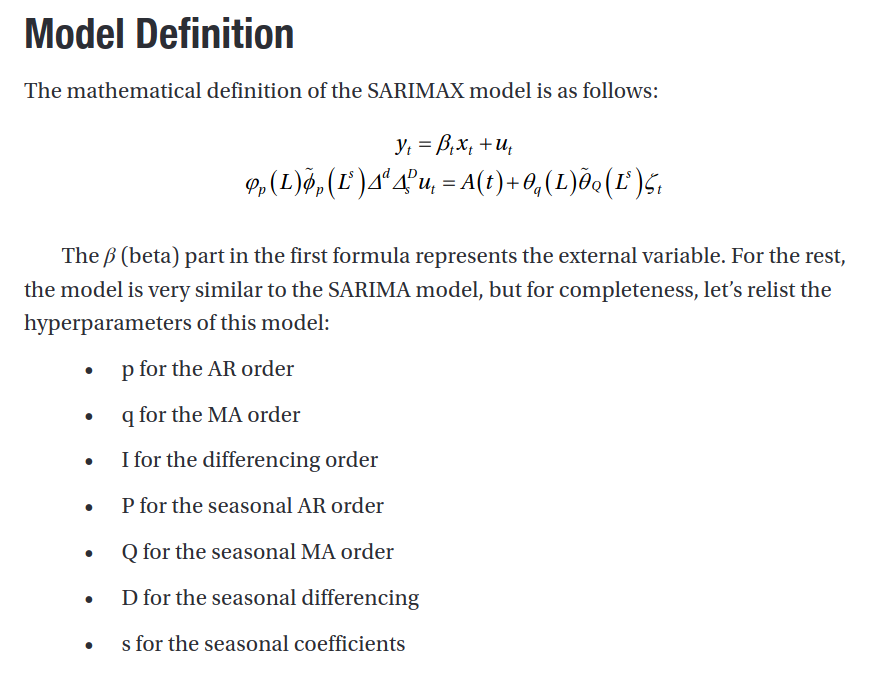


#Supervised Models vs. SARIMAX

In future sessions, you’ll see many cases of supervised models. As you may recall, supervised models use external variables to predict a target variable.

This idea is very similar to the X part in SARIMAX.

The question, of course, is which one of them you should use in practice.

From a theoretical point of view, SARIMAX may be preferred in cases where the time series part is more present than the external variables part. If the external variables alone can explain a lot and this is complemented by a part of autocorrelation or seasonality, supervised models may be the better choice.

Yet, as always, the reasonable thing to do is to use multiple models in a model
benchmark. The choice for a model should then simply be based on the predictive
performance of the model.

#Example of SARIMAX on the Walmart Dataset

In the previous session, we used the SARIMA model to predict weekly sales
at Walmart.

Yet the dataset does not just contain weekly sales data: there is also an
indicator that tells you whether a week did or did not have a holiday in it.



## Listing 8-1. Preparing the data and making a plot

You did not use the holiday information in the SARIMA model, as it is impossible
to add external data to it. And this did not really matter as there were no extreme peaks due to holidays in the test data.

Even though the holiday information was missing in the model, it was not represented in the error estimate.

Yet it is important to add such information, as it may be able to explain a large part of the variation in the model. Let’s see how to improve on the Walmart example using external variables.

As a first step, you should import and prepare the data.



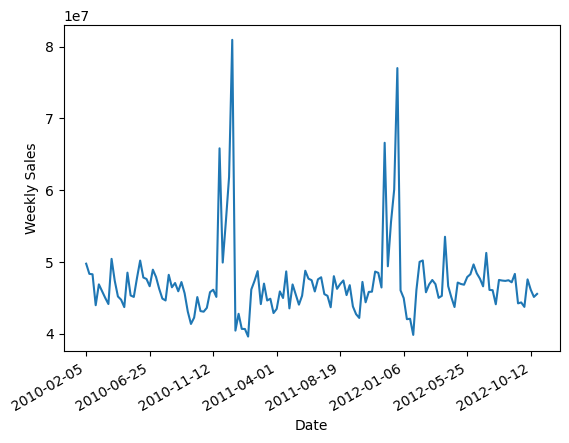

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/kboroz/TimeSeriesPredictionWS2023/main/train.csv'
data = pd.read_csv(url)


data = data.groupby('Date').sum()
data['IsHoliday'] = data['IsHoliday'] > 0
data['IsHoliday'] = data['IsHoliday'].apply(
    lambda x: float(x)
)

ax = data['Weekly_Sales'].plot()
ax.set_ylabel('Weekly Sales')
plt.gcf().autofmt_xdate()
plt.show()


The next step is to use correlation analysis to study whether we may expect an
improvement from adding the holiday information into the model. If there is no
correlation at all between sales and holidays, it would be unwise to add it to the model.

## Listing 8-2 Is there a correlation between sales and holidays?

In [ ]:
data[['Weekly_Sales', 'IsHoliday']].corr()

,Weekly_Sales,IsHoliday
Weekly_Sales,1.000000,0.172683
IsHoliday,0.172683,1.000000


The correlation coefficient between sales and holidays is 0.17. This is not very high, but enough to consider adding the variable to the model.

The model itself will compute the most appropriate coefficient for the variable.

It is important to note the terminology of endog and exog:
- Endogenous variables (endog) are the target variable. This is where
all the time series components will be estimated from. In the current
case, it is the weekly sales.
- Exogenous variables (exog) are explanatory variables. This is where
the model takes additional correlation from. In the current example,
this is the holiday variable.

For this particular example, we reuse the previous hyperparameter search again. If you remember from the previous session, the optimal score was found using SARIMA(0,1,1)(1,1,1),52.

So for this example, let’s use SARIMAX(0,1,1)(1,1,1)52.

The code alsocomputes an R2 score and will show the plot of performance on a test set of 10 weeks.

## Listing 8-3 Fitting a SARIMAX model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


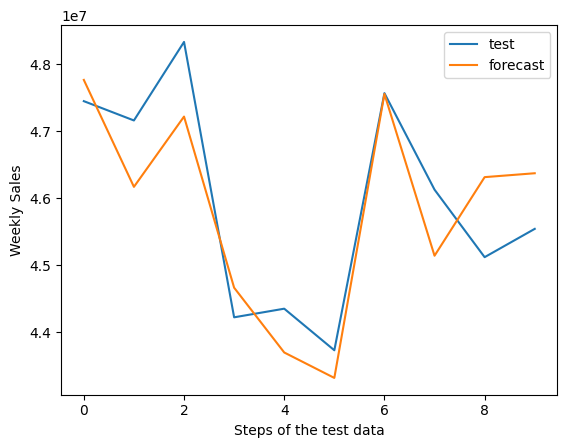

0.734340863184538

In [ ]:
import random
random.seed(12345)
import statsmodels.api as sm
from sklearn.metrics import r2_score

train = data['Weekly_Sales'][:-10]
test = data['Weekly_Sales'][-10:]

mod = sm.tsa.statespace.SARIMAX(
    endog=data['Weekly_Sales'][:-10],
    exog=data['IsHoliday'][:-10],
    order=(0,1,1),
    seasonal_order=(1,1,1,52),
)
res = mod.fit(disp=False)
fcst = res.forecast(steps=10, exog = data['IsHoliday'][-10:])

plt.plot(list(test))
plt.plot(list(fcst))
plt.xlabel('Steps of the test data')
plt.ylabel('Weekly Sales')
plt.legend(['test', 'forecast'])
plt.show()
r2_score(test, fcst)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


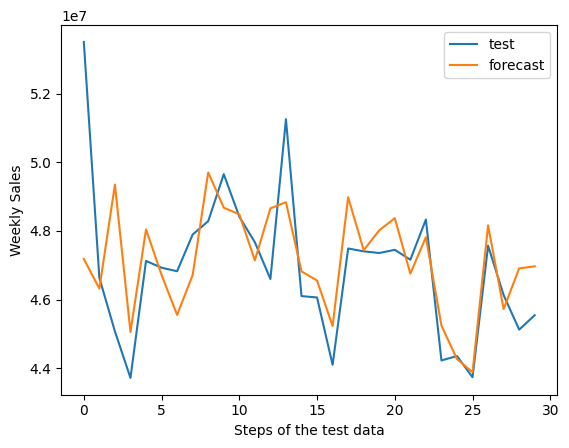

0.315726724096958

In [ ]:
import random
random.seed(12345)
import statsmodels.api as sm
from sklearn.metrics import r2_score

train = data['Weekly_Sales'][:-30]
test = data['Weekly_Sales'][-30:]

mod = sm.tsa.statespace.SARIMAX(
    endog=data['Weekly_Sales'][:-30],
    exog=data['IsHoliday'][:-30],
    order=(0,1,1),
    seasonal_order=(1,1,1,52),
)
res = mod.fit(disp=False)
fcst = res.forecast(steps=30, exog = data['IsHoliday'][-30:])

plt.plot(list(test))
plt.plot(list(fcst))
plt.xlabel('Steps of the test data')
plt.ylabel('Weekly Sales')
plt.legend(['test', 'forecast'])
plt.show()
r2_score(test, fcst)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


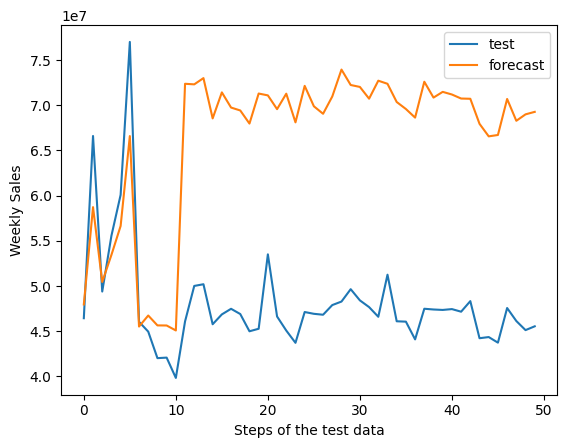

-11.487156994472807

In [ ]:
import random
random.seed(12345)
import statsmodels.api as sm
from sklearn.metrics import r2_score

train = data['Weekly_Sales'][:-50]
test = data['Weekly_Sales'][-50:]

mod = sm.tsa.statespace.SARIMAX(
    endog=data['Weekly_Sales'][:-50],
    exog=data['IsHoliday'][:-50],
    order=(0,1,1),
    seasonal_order=(1,1,1,52),
)
res = mod.fit(disp=False)
fcst = res.forecast(steps=50, exog = data['IsHoliday'][-50:])

plt.plot(list(test))
plt.plot(list(fcst))
plt.xlabel('Steps of the test data')
plt.ylabel('Weekly Sales')
plt.legend(['test', 'forecast'])
plt.show()
r2_score(test, fcst)
